# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [ ]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [ ]:
%pip install --upgrade plotly

Requirement already up-to-date: plotly in /usr/local/lib/python3.6/dist-packages (4.12.0)


### Import Statements

In [131]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [2]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [3]:
df_data = pd.read_csv('data\mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [4]:
print(f"Data has {df_data.shape[0]} rows and {df_data.shape[1]} columns.")
df_data.columns

Data has 4324 rows and 9 columns.


Index(['Unnamed: 0.1', 'Unnamed: 0', 'Organisation', 'Location', 'Date',
       'Detail', 'Rocket_Status', 'Price', 'Mission_Status'],
      dtype='object')

In [6]:
print(f"NaN values? {df_data.isna().values.any()}")
print(f"Duplicated rows? {df_data.duplicated().values.any()}")

NaN values? True
Duplicated rows? False


In [8]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [13]:
df_data.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'], inplace=True)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,NaN,Success
3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


In [308]:
df_data['Date'] = pd.to_datetime(df_data['Date'], format='mixed', utc=True)
df_data['Price'] = df_data['Price'].str.replace(',', '').str.replace('$', '').astype(float)

In [309]:
df_data['Country'] = df_data['Location'].str.split(',').str[-1].str.strip()

In [310]:
df_data['Country'] = df_data['Country'].replace({
    'Russia': 'Russian Federation',
    'New Mexico': 'USA',
    'Yellow Sea': 'China',
    'Shahrud Missile Test Site': 'Iran',
    'Pacific Missile Range Facility': 'USA',
    'Barents Sea': 'Russian Federation',
    'Gran Canaria': 'USA'})

In [311]:
df_data.sample(10)

,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country
1261,Lockheed,"SLC-41, Cape Canaveral AFS, Florida, USA",1999-04-09 17:01:00+00:00,Titan IV(402)B | DSP,StatusRetired,NaN,Failure,USA
2314,RVSN USSR,"Site 90/19, Baikonur Cosmodrome, Kazakhstan",1982-08-30 10:06:00+00:00,Tsyklon-2 | Cosmos 1402,StatusRetired,NaN,Success,Kazakhstan
1979,Arianespace,"ELA-1, Guiana Space Centre, French Guiana, France",1987-09-16 00:45:00+00:00,"Ariane 3 | Aussat-A3, Eutelsat 1-F4",StatusRetired,NaN,Success,France
80,ISRO,"Second Launch Pad, Satish Dhawan Space Centre,...",2019-11-27 03:58:00+00:00,PSLV-XL | Cartosat-3 & Rideshares,StatusActive,31.00,Success,India
3782,General Dynamics,"SLC-36B, Cape Canaveral AFS, Florida, USA",1967-04-17 07:05:00+00:00,Atlas-LV3C Centaur-D | Surveyor 3,StatusRetired,NaN,Success,USA
3952,General Dynamics,"LC-13, Cape Canaveral AFS, Florida, USA",1965-07-20 08:27:00+00:00,Atlas-LV3 Agena-D | Vela 3A/3B,StatusRetired,NaN,Success,USA
706,ULA,"SLC-37B, Cape Canaveral AFS, Florida, USA",2010-11-21 22:58:00+00:00,Delta IV Heavy | NROL-32,StatusActive,350.00,Success,USA
1937,RVSN USSR,"Site 133/3, Plesetsk Cosmodrome, Russia",1988-07-18 22:28:00+00:00,Cosmos-3M (11K65M) | Cosmos 1959,StatusRetired,NaN,Success,Russian Federation
3852,General Dynamics,"SLC-4E, Vandenberg AFB, California, USA",1966-08-16 18:30:00+00:00,Atlas-SLV3 Agena-D | KH-7 Gambit 4031,StatusRetired,NaN,Success,USA
2118,ISAS,"Mu Pad, Uchinoura Space Center, Japan",1985-08-18 23:33:00+00:00,Mu-III S2 | Suisei,StatusRetired,NaN,Success,Japan


## Descriptive Statistics

In [312]:
df_data.describe()

,Price
count,964.00
mean,153.79
std,288.45
min,5.30
25%,40.00
50%,62.00
75%,164.00
max,"5,000.00"


In [313]:
print(f"There are {df_data['Organisation'].nunique()} unique organisations in the dataset.")
df_data['Organisation'].value_counts()

There are 56 unique organisations in the dataset.


Organisation
RVSN USSR           1777
Arianespace          279
General Dynamics     251
CASC                 251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
Rocket Lab            13
ISA                   13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
JAXA                   7
Land Launch            7
MITT                   7
UT                     5
CASIC                  5
KCST                   5
Exos                   4
CECLES                 4
Arm??e de l'

In [314]:
print(f"There are {df_data['Country'].nunique()} unique countries in the dataset.")
df_data['Country'].value_counts()

There are 16 unique countries in the dataset.


Country
Russian Federation    1398
USA                   1351
Kazakhstan             701
France                 303
China                  269
Japan                  126
India                   76
Pacific Ocean           36
Iran                    14
New Zealand             13
Israel                  11
Kenya                    9
Australia                6
North Korea              5
Brazil                   3
South Korea              3
Name: count, dtype: int64

In [315]:
df_data['Mission_Status'].value_counts()

Mission_Status
Success              3879
Failure               339
Partial Failure       102
Prelaunch Failure       4
Name: count, dtype: int64

In [316]:
df_data['Rocket_Status'].value_counts()

Rocket_Status
StatusRetired    3534
StatusActive      790
Name: count, dtype: int64

# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

In [317]:
launches_by_org = df_data.groupby(['Organisation']).agg({'Organisation': 'count'}).rename(columns={'Organisation': 'Launches'})
launches_by_org.reset_index(inplace=True)
launches_by_org.sort_values('Launches', ascending=False, inplace=True)

In [318]:
px.bar(launches_by_org,
       x='Organisation',
       y='Launches',
       title='Launches by Organisation',
       labels={'x': 'Organisation', 'y': 'Launches'},
       color='Launches',
       color_continuous_scale='Viridis').show()

# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

In [321]:
active_rockets = df_data[df_data['Rocket_Status'] == 'StatusActive']
retired_rockets = df_data[df_data['Rocket_Status'] == 'StatusRetired']

In [322]:
print(f"Active rockets: {active_rockets.shape[0]}")
print(f"Retired rockets: {retired_rockets.shape[0]}")

Active rockets: 790
Retired rockets: 3534


# Distribution of Mission Status

How many missions were successful?
How many missions failed?

In [323]:
num_successes = df_data[df_data['Mission_Status'] == 'Success'].shape[0]
num_failures = df_data[df_data['Mission_Status'] == 'Failure'].shape[0] + df_data[df_data['Mission_Status'] == 'Partial Failure'].shape[0] + df_data[df_data['Mission_Status'] == 'Prelaunch Failure'].shape[0]

In [324]:
print(f"Successes: {num_successes}")
print(f"Failures: {num_failures}")

Successes: 3879
Failures: 445


# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

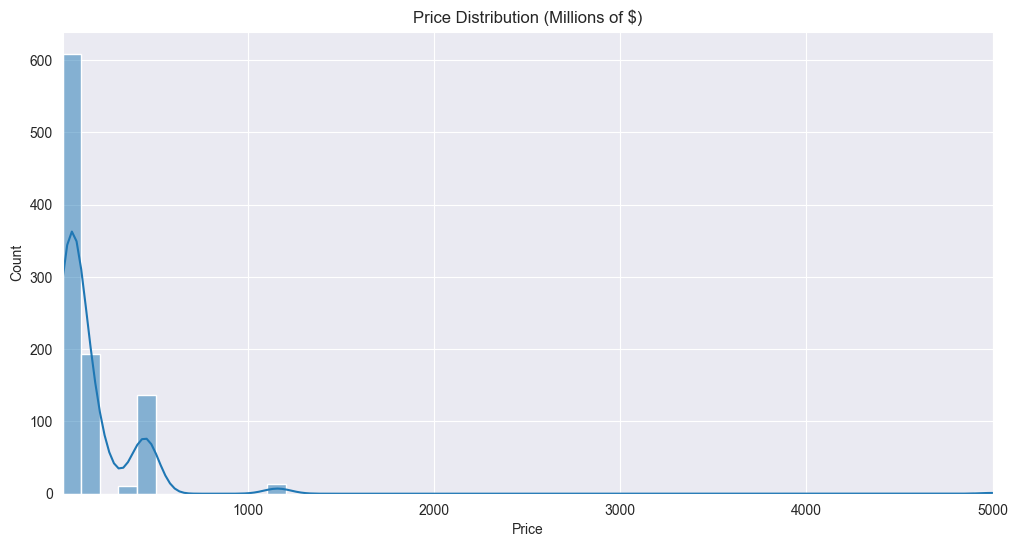

In [325]:
with sns.axes_style('darkgrid'):
    plt.figure(figsize=(12, 6))
    price_distribution = sns.histplot(df_data['Price'], bins=50, kde=True)
    price_distribution.set(xlim=(df_data['Price'].min(), df_data['Price'].max()))
    plt.title('Price Distribution (Millions of $)')
    plt.show()

# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [326]:
launches_by_country = df_data.groupby(['Country']).agg({'Country': 'count'}).rename(columns={'Country': 'Launches'})

In [327]:
px.choropleth(launches_by_country,
                locations=launches_by_country.index,
                locationmode='country names',
                color='Launches',
                title='Launches by Country',
                labels={'Launches': 'Launches'},
                color_continuous_scale='Viridis',
                projection='natural earth').show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [328]:
failures_by_country = df_data[df_data['Mission_Status'].isin(['Failure', 'Partial Failure', 'Prelaunch Failure'])].groupby(['Country']).agg({'Country': 'count'}).rename(columns={'Country': 'Failures'})

In [329]:
px.choropleth(failures_by_country,
                locations=failures_by_country.index,
                locationmode='country names',
                color='Failures',
                title='Failures by Country',
                labels={'Failures': 'Failures'},
                color_continuous_scale='Viridis',
                projection='natural earth').show()

# Create a Plotly Sunburst Chart of the countries, organisations, and mission status. 

In [330]:
px.sunburst(df_data,
            path=['Country', 'Organisation', 'Mission_Status'],
            title='Mission Status by Organisation and Country').show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

In [332]:
spending_by_organization = df_data.groupby(['Organisation']).agg({'Price': 'sum'}).reset_index().rename(columns={'Price': 'Total Spending'})

In [333]:
spending_by_organization.describe()

,Total Spending
count,56.00
mean,"2,647.42"
std,"10,553.43"
min,0.00
25%,0.00
50%,0.00
75%,837.92
max,"76,280.00"


In [334]:
spending_by_organization.sort_values('Total Spending', ascending=True, inplace=True)
px.bar(spending_by_organization,
       orientation='h',
       x='Total Spending',
       y='Organisation',
       title='Total Spending by Organisation',
       labels={'Total Spending': 'Total Spending (Millions of $)', 'Organisation': 'Organisation'},
       color='Total Spending',
       color_continuous_scale='Viridis').show()

# Analyse the Amount of Money Spent by Organisation per Launch

In [335]:
launches_and_spending = pd.merge(launches_by_org, spending_by_organization, on='Organisation')
launches_and_spending['Spending per Launch'] = launches_and_spending['Total Spending'] / launches_and_spending['Launches']

In [336]:
launches_and_spending.describe()

,Launches,Total Spending,Spending per Launch
count,56.00,56.00,56.00
mean,77.21,"2,647.42",17.59
std,242.41,"10,553.43",52.66
min,1.00,0.00,0.00
25%,3.00,0.00,0.00
50%,9.50,0.00,0.00
75%,76.75,837.92,16.25
max,"1,777.00","76,280.00",375.76


In [339]:
print(f"On average, organisations spend ${launches_and_spending['Spending per Launch'].mean():,.2f} million dollars per launch.")
print(f"{launches_and_spending[launches_and_spending['Spending per Launch'] == launches_and_spending['Spending per Launch'].max()]['Organisation'].values[0]} spends the most per launch, at ${launches_and_spending['Spending per Launch'].max():,.2f} million dollars.")
print(f"{launches_and_spending[launches_and_spending['Spending per Launch'] == launches_and_spending['Spending per Launch'].min()]['Organisation'].values[0]} spends the least per launch, at ${launches_and_spending['Spending per Launch'].min():,.2f} million dollars.")
print(f"{launches_and_spending[launches_and_spending['Total Spending'] == launches_and_spending['Total Spending'].max()]['Organisation'].values[0]} spends the most overall, at ${launches_and_spending['Total Spending'].max():,.2f} million dollars.")
print(f"{launches_and_spending[launches_and_spending['Total Spending'] == launches_and_spending['Total Spending'].min()]['Organisation'].values[0]} spends the least overall, at ${launches_and_spending['Total Spending'].min():,.2f} million dollars.")
print(f"{launches_and_spending[launches_and_spending['Launches'] == launches_and_spending['Launches'].max()]['Organisation'].values[0]} has the most launches, at {launches_and_spending['Launches'].max()}.")
print(f"{launches_and_spending[launches_and_spending['Launches'] == launches_and_spending['Launches'].min()]['Organisation'].values[0]} has the least launches, at {launches_and_spending['Launches'].min()}.")

On average, organisations spend $17.59 million dollars per launch.
NASA spends the most per launch, at $375.76 million dollars.
General Dynamics spends the least per launch, at $0.00 million dollars.
NASA spends the most overall, at $76,280.00 million dollars.
General Dynamics spends the least overall, at $0.00 million dollars.
RVSN USSR has the most launches, at 1777.
Douglas has the least launches, at 1.


In [340]:
launches_and_spending.sort_values('Spending per Launch', ascending=True, inplace=True)
px.bar(launches_and_spending,
         orientation='h',
         x='Spending per Launch',
         y='Organisation',
         title='Spending per Launch by Organisation',
         labels={'Spending per Launch': 'Spending per Launch (Millions of $)', 'Organisation': 'Organisation'},
         color='Spending per Launch',
         color_continuous_scale='Viridis').show()

# Chart the Number of Launches per Year

In [305]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
years_fmt = mdates.DateFormatter('%Y')

In [341]:
launches_by_year = df_data.groupby(df_data['Date'].dt.year).agg({'Date': 'count'}).rename(columns={'Date': 'Launches'})
launches_by_year.reset_index(inplace=True)
launches_by_year.rename(columns={'Date': 'Year'}, inplace=True)

In [342]:
px.line(launches_by_year,
        x='Year',
        y='Launches',
        title='Launches by Year',
        labels={'Year': 'Year', 'Launches': 'Launches'}).show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

In [343]:
launches_by_month_year = df_data.groupby([df_data['Date'].dt.year, df_data['Date'].dt.month]).agg({'Date': 'count'}).rename(columns={'Date': 'Launches'})
launches_by_month_year['Month'] = launches_by_month_year.index.get_level_values(1)
launches_by_month_year['Year'] = launches_by_month_year.index.get_level_values(0)
launches_by_month_year.reset_index(drop=True, inplace=True)
launches_by_month_year = launches_by_month_year[['Year', 'Month', 'Launches']]
launches_by_month_year['Month_Years'] = pd.to_datetime(launches_by_month_year[['Year', 'Month']].assign(day=1))
launches_by_month_year = launches_by_month_year[['Month_Years', 'Launches']]

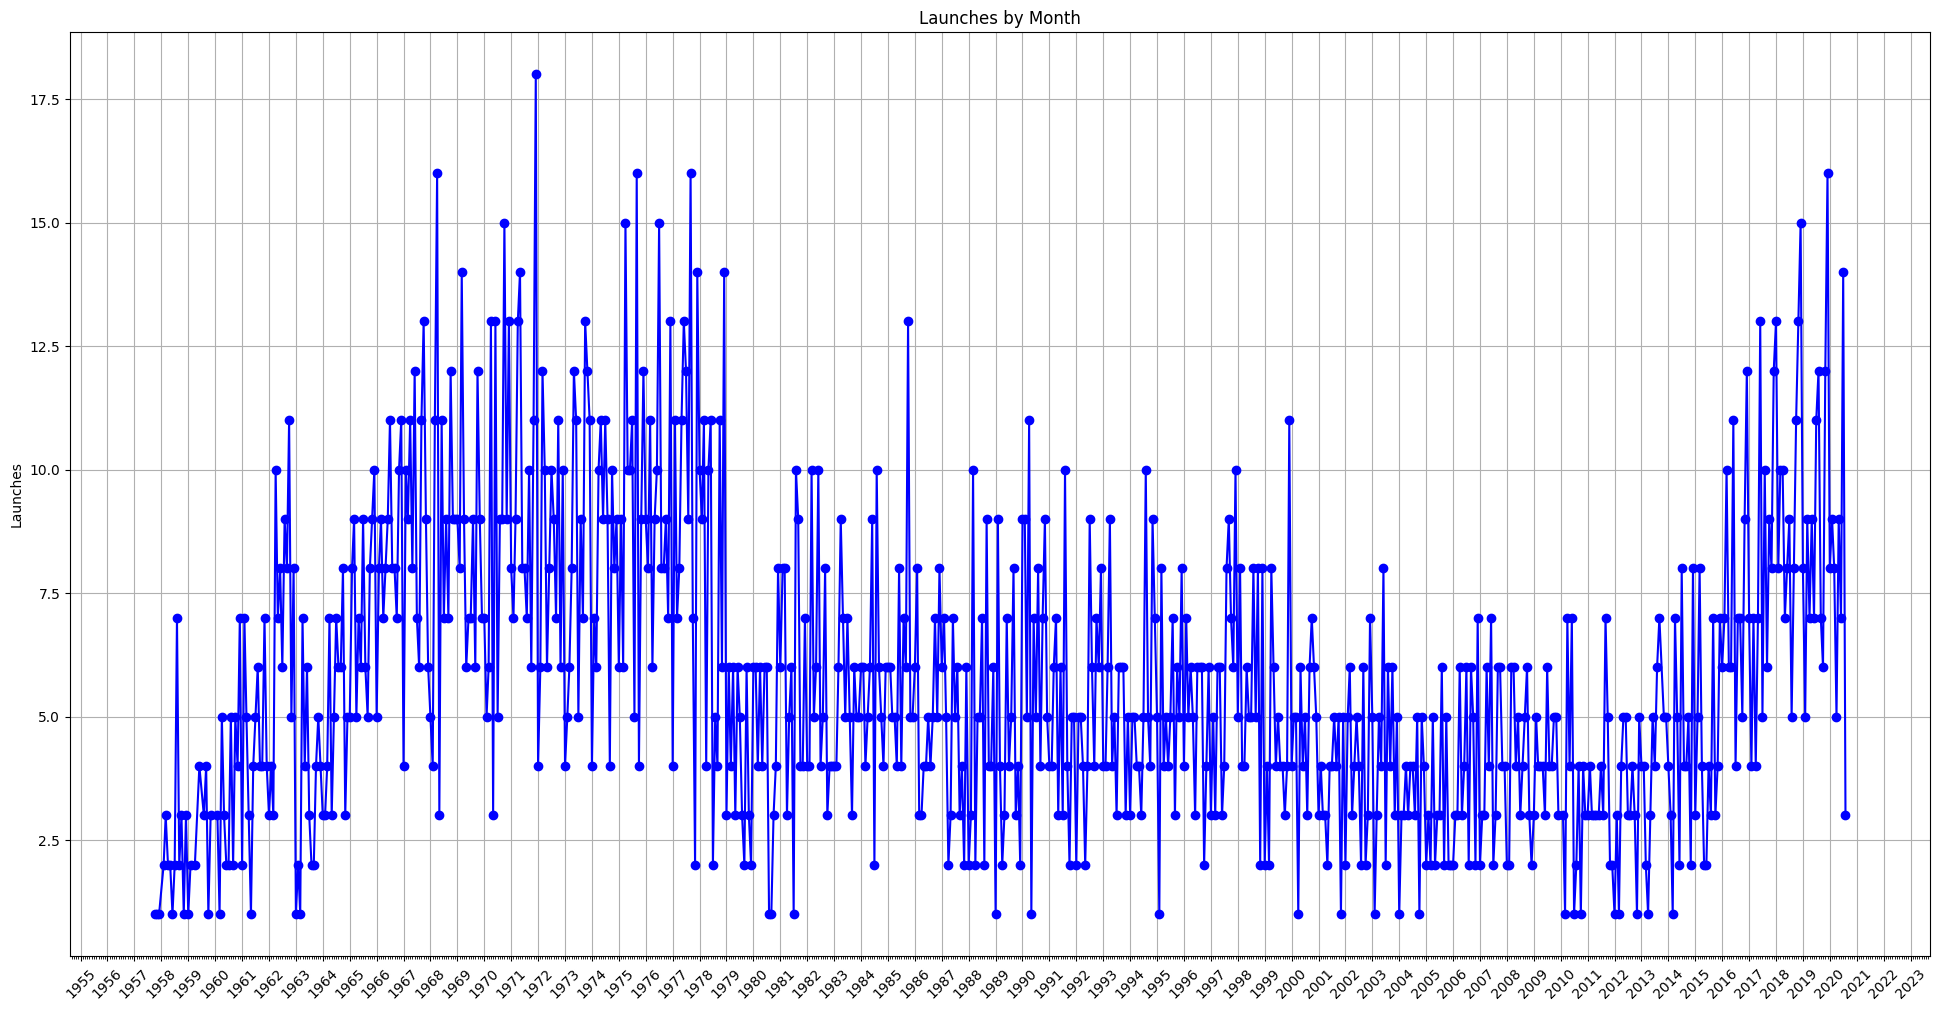

In [349]:
plt.figure(figsize=(24, 12))
ax1 = plt.gca()

ax1.set_ylabel('Launches')

ax1.plot(launches_by_month_year['Month_Years'], launches_by_month_year['Launches'], color='blue', marker='o', linestyle='-')

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(years_fmt)
ax1.xaxis.set_minor_locator(months)
ax1.xaxis.set_tick_params(rotation=45, labelsize=10)

plt.grid(True)
plt.title('Launches by Month')
plt.show()

# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

In [351]:
launches_by_month = df_data.groupby(df_data['Date'].dt.month).agg({'Date': 'count'}).rename(columns={'Date': 'Launches'})
launches_by_month.reset_index(inplace=True)
launches_by_month.rename(columns={'Date': 'Month'}, inplace=True)
launches_by_month['Month'] = launches_by_month['Month'].apply(lambda x: datetime.strptime(str(x), '%m').strftime('%B'))

In [352]:
print(f"{launches_by_month['Month'][launches_by_month['Launches'].idxmax()]} has the most launches, with {launches_by_month['Launches'].max()} launches.")
print(f"{launches_by_month['Month'][launches_by_month['Launches'].idxmin()]} has the least launches, with {launches_by_month['Launches'].min()} launches.")

December has the most launches, with 450 launches.
January has the least launches, with 268 launches.


# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [353]:
average_cost_by_year = df_data.groupby(df_data['Date'].dt.year).agg({'Price': 'mean'}).rename(columns={'Price': 'Average Cost'})
average_cost_by_year.reset_index(inplace=True)
average_cost_by_year.rename(columns={'Date': 'Year'}, inplace=True)

In [354]:
px.line(average_cost_by_year,
        x='Year',
        y='Average Cost',
        title='Average Cost by Year').show()

Gaps in lines are likely caused by NaN data.

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

In [356]:
top_10_orgs = launches_by_org.head(10)

In [357]:
launches_by_org_per_year = df_data.groupby([df_data['Date'].dt.year, 'Organisation']).agg({'Date': 'count'}).rename(columns={'Date': 'Launches'})
launches_by_org_per_year['Organisation'] = launches_by_org_per_year.index.get_level_values(1)
launches_by_org_per_year['Year'] = launches_by_org_per_year.index.get_level_values(0)
launches_by_org_per_year.reset_index(drop=True, inplace=True)
launches_by_org_per_year = launches_by_org_per_year[['Year', 'Organisation', 'Launches']]
top_10_orgs_over_time = launches_by_org_per_year[launches_by_org_per_year['Organisation'].isin(top_10_orgs['Organisation'])]

In [358]:
px.line(top_10_orgs_over_time,
        x='Year',
        y='Launches',
        title='Launches by Organisation over Time',
        color='Organisation').show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

In [359]:
cold_war_data = df_data[df_data['Date'].dt.year <= 1991]

In [360]:
cold_war_data['Country'] = cold_war_data['Country'].replace({
    'Russian Federation': 'USSR',
    'Kazakhstan': 'USSR'})

C:\Users\campr\AppData\Local\Temp\ipykernel_12992\555192718.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## Create a Plotly Pie Chart comparing the total number of launches of the USSR and the USA

Hint: Remember to include former Soviet Republics like Kazakhstan when analysing the total number of launches. 

In [361]:
cold_war_launches_by_country = cold_war_data.groupby(['Country']).agg({'Country': 'count'}).rename(columns={'Country': 'Launches'})

In [362]:
px.pie(cold_war_launches_by_country,
       values='Launches',
       names=cold_war_launches_by_country.index,
       title='Cold War Launches by Country').show()

## Create a Chart that Shows the Total Number of Launches Year-On-Year by the Two Superpowers

In [363]:
cold_war_superpower_data = cold_war_data[cold_war_data['Country'].isin(['USA', 'USSR'])]

In [366]:
cold_war_superpower_launches_by_year = cold_war_superpower_data.groupby([cold_war_superpower_data['Date'].dt.year, 'Country']).agg({'Date': 'count'}).rename(columns={'Date': 'Launches'})
cold_war_superpower_launches_by_year['Country'] = cold_war_superpower_launches_by_year.index.get_level_values(1)
cold_war_superpower_launches_by_year['Year'] = cold_war_superpower_launches_by_year.index.get_level_values(0)
cold_war_superpower_launches_by_year.reset_index(drop=True, inplace=True)
cold_war_superpower_launches_by_year = cold_war_superpower_launches_by_year[['Year', 'Country', 'Launches']]

In [367]:
px.line(cold_war_superpower_launches_by_year,
        x='Year',
        y='Launches',
        title='Cold War Superpower Launches by Year',
        color='Country',
        labels={'Year': 'Year', 'Launches': 'Launches'}).show()

## Chart the Total Number of Mission Failures Year on Year.

In [371]:
cold_war_superpower_failure_data = cold_war_superpower_data[cold_war_superpower_data['Mission_Status'].isin(['Failure', 'Partial Failure', 'Prelaunch Failure'])]
cold_war_superpower_failures_by_year = cold_war_superpower_failure_data.groupby([cold_war_superpower_failure_data['Date'].dt.year, 'Country']).agg({'Date': 'count'}).rename(columns={'Date': 'Failures'})
cold_war_superpower_failures_by_year['Country'] = cold_war_superpower_failures_by_year.index.get_level_values(1)
cold_war_superpower_failures_by_year['Year'] = cold_war_superpower_failures_by_year.index.get_level_values(0)
cold_war_superpower_failures_by_year.reset_index(drop=True, inplace=True)
cold_war_superpower_failures_by_year = cold_war_superpower_failures_by_year[['Year', 'Country', 'Failures']]

In [372]:
px.line(cold_war_superpower_failures_by_year,
        x='Year',
        y='Failures',
        title='Cold War Superpower Failures by Year',
        color='Country',
        labels={'Year': 'Year', 'Failures': 'Failures'}).show()

## Chart the Percentage of Failures over Time

Did failures go up or down over time? Did the countries get better at minimising risk and improving their chances of success over time? 

In [375]:
cold_war_superpower_data['Mission_Status'] = cold_war_superpower_data['Mission_Status'].replace({
    'Partial Failure': 'Failure',
    'Prelaunch Failure': 'Failure'})

C:\Users\campr\AppData\Local\Temp\ipykernel_12992\2525090291.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [385]:
cold_war_superpower_launches_status_by_year = cold_war_superpower_data.groupby([cold_war_superpower_data['Date'].dt.year, 'Country', 'Mission_Status']).agg({'Date': 'count'}).rename(columns={'Date': 'Count'})
cold_war_superpower_launches_status_by_year['Country'] = cold_war_superpower_launches_status_by_year.index.get_level_values(1)
cold_war_superpower_launches_status_by_year['Year'] = cold_war_superpower_launches_status_by_year.index.get_level_values(0)
cold_war_superpower_launches_status_by_year['Mission_Status'] = cold_war_superpower_launches_status_by_year.index.get_level_values(2)
cold_war_superpower_launches_status_by_year.reset_index(drop=True, inplace=True)
cold_war_superpower_launches_status_by_year = cold_war_superpower_launches_status_by_year[['Year', 'Country', 'Mission_Status', 'Count']]
cold_war_superpower_launches_status_by_year['Successes'] = cold_war_superpower_launches_status_by_year['Count'].where(cold_war_superpower_launches_status_by_year['Mission_Status'] == 'Success', 0)
cold_war_superpower_launches_status_by_year['Failures'] = cold_war_superpower_launches_status_by_year['Count'].where(cold_war_superpower_launches_status_by_year['Mission_Status'] == 'Failure', 0)
cold_war_superpower_launches_status_by_year.rename(columns={'Count': 'Launches'}, inplace=True)
cold_war_superpower_launches_status_by_year = cold_war_superpower_launches_status_by_year[['Year', 'Country', 'Launches', 'Successes', 'Failures']]
cold_war_superpower_launches_status_by_year['Failure Rate'] = cold_war_superpower_launches_status_by_year['Failures'] / cold_war_superpower_launches_status_by_year['Launches']
cold_war_superpower_launches_status_by_year['Success Rate'] = cold_war_superpower_launches_status_by_year['Successes'] / cold_war_superpower_launches_status_by_year['Launches']
# Combine any rows where the year and country are the same
cold_war_superpower_launches_status_by_year = cold_war_superpower_launches_status_by_year.groupby(['Year', 'Country']).agg({'Launches': 'sum', 'Successes': 'sum', 'Failures': 'sum'}).reset_index()
cold_war_superpower_launches_status_by_year['Failure Rate'] = cold_war_superpower_launches_status_by_year['Failures'] / cold_war_superpower_launches_status_by_year['Launches']
cold_war_superpower_launches_status_by_year['Success Rate'] = cold_war_superpower_launches_status_by_year['Successes'] / cold_war_superpower_launches_status_by_year['Launches']

In [386]:
px.line(cold_war_superpower_launches_status_by_year,
        x='Year',
        y='Failure Rate',
        title='Cold War Superpower Failure Rate by Year',
        color='Country',
        labels={'Year': 'Year', 'Failure Rate': 'Failure Rate'}).show()

Failure rates decreased as time progressed.

# For Every Year Show which Country was in the Lead in terms of Total Number of Launches up to and including including 2020)

Do the results change if we only look at the number of successful launches? 

In [390]:
launches_by_year_by_country = df_data.groupby([df_data['Date'].dt.year, 'Country']).agg({'Date': 'count'}).rename(columns={'Date': 'Launches'})
launches_by_year_by_country['Country'] = launches_by_year_by_country.index.get_level_values(1)
launches_by_year_by_country['Year'] = launches_by_year_by_country.index.get_level_values(0)
launches_by_year_by_country.reset_index(drop=True, inplace=True)
launches_by_year_by_country = launches_by_year_by_country[['Year', 'Country', 'Launches']]
most_launches_by_year = launches_by_year_by_country.loc[launches_by_year_by_country.groupby('Year')['Launches'].idxmax()]

In [392]:
# Show the country with the most launches each year from 1957 to 2020
px.bar(most_launches_by_year,
        x='Year',
        y='Launches',
        title='Country with the Most Launches by Year',
        color='Country',
        labels={'Year': 'Year', 'Launches': 'Launches'}).show()

In [393]:
successful_launches = df_data[df_data['Mission_Status'] == 'Success']
successful_launches_by_year_by_country = successful_launches.groupby([successful_launches['Date'].dt.year, 'Country']).agg({'Date': 'count'}).rename(columns={'Date': 'Successes'})
successful_launches_by_year_by_country['Country'] = successful_launches_by_year_by_country.index.get_level_values(1)
successful_launches_by_year_by_country['Year'] = successful_launches_by_year_by_country.index.get_level_values(0)
successful_launches_by_year_by_country.reset_index(drop=True, inplace=True)
successful_launches_by_year_by_country = successful_launches_by_year_by_country[['Year', 'Country', 'Successes']]
most_successful_launches_by_year = successful_launches_by_year_by_country.loc[successful_launches_by_year_by_country.groupby('Year')['Successes'].idxmax()]

In [394]:
px.bar(most_successful_launches_by_year,
        x='Year',
        y='Successes',
        title='Country with the Most Successful Launches by Year',
        color='Country',
        labels={'Year': 'Year', 'Successes': '# of Successful Launches'}).show()

Results generally show the country with the most launches per year also have the most successes per year.

# Create a Year-on-Year Chart Showing the Organisation Doing the Most Number of Launches

Which organisation was dominant in the 1970s and 1980s? Which organisation was dominant in 2018, 2019 and 2020? 

In [398]:
leading_org_by_year = launches_by_org_per_year.loc[launches_by_org_per_year.groupby('Year')['Launches'].idxmax()]

In [397]:
px.bar(leading_org_by_year,
        x='Year',
        y='Launches',
        title='Leading Organisation by Year',
        color='Organisation',
        labels={'Year': 'Year', 'Launches': 'Launches'}).show()